      0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
                0           1           2            4           5  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
ma

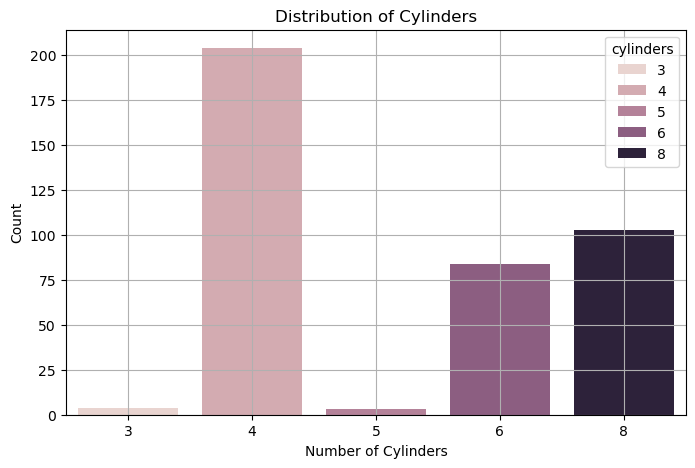

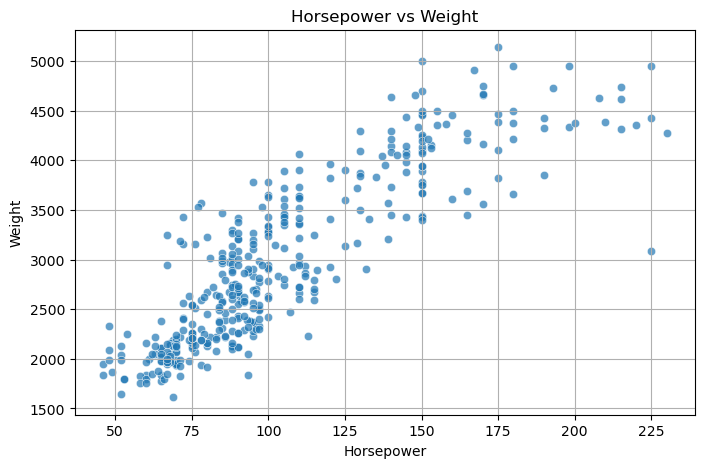

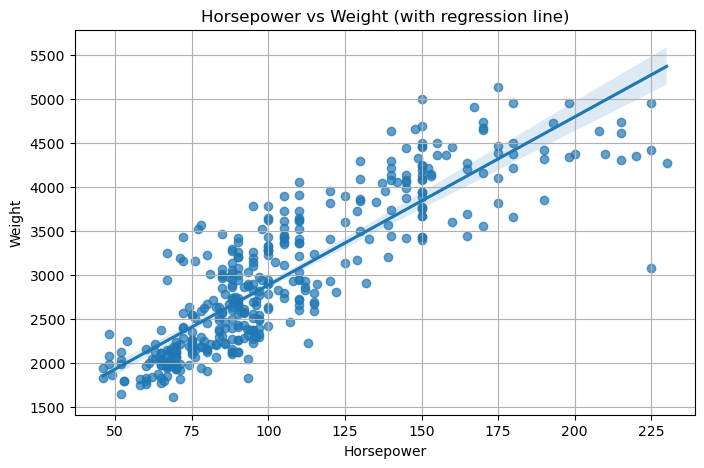

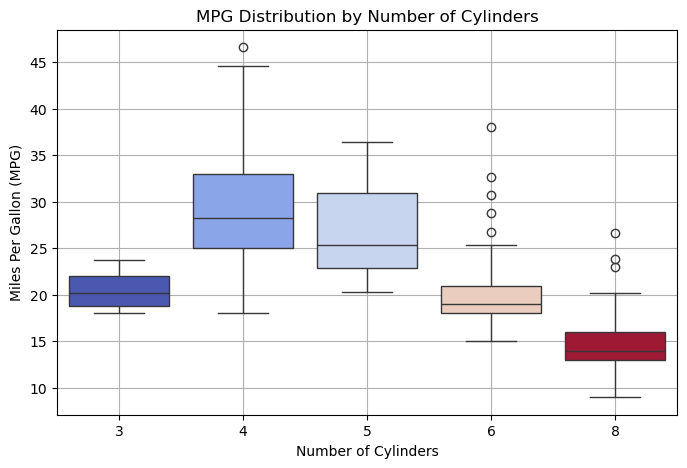

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('auto-mpg.data', sep=r'\s+', header=None)  # Use raw string to avoid the escape sequence warning

# Step 2: Review the data
print(df.head())
print(df.describe())  # Basic statistics to understand the data
print(df.shape)  # Shape of the dataset

# Step 3: Assign column names
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]
df.columns = column_names

# Step 4: Handle missing values in 'horsepower'
df['horsepower'] = df['horsepower'].replace('?', np.nan)  # Replace '?' with NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert to numeric, coercing errors
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())  # Fill NaN with median

# Check for missing values in other columns
print(df.isnull().sum())

# Step 5: Convert 'origin' codes to country names
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Asia', 3: 'Europe'})

# Step 6: Bar chart - Distribution of cylinders
plt.figure(figsize=(8, 5))
sns.countplot(x='cylinders', data=df, hue='cylinders')  # Assign hue to avoid deprecated palette warning
plt.xlabel("Number of Cylinders")
plt.ylabel("Count")
plt.title("Distribution of Cylinders")
plt.grid(True)  # Add gridlines
plt.show()

# Step 7: Scatter plot - Relationship between horsepower and weight
plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='weight', data=df, alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.title("Horsepower vs Weight")
plt.grid(True)  # Add gridlines
plt.show()

# Optional: Add a regression line to scatter plot
plt.figure(figsize=(8, 5))
sns.regplot(x='horsepower', y='weight', data=df, scatter_kws={'alpha': 0.7})
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.title("Horsepower vs Weight (with regression line)")
plt.grid(True)
plt.show()

# Step 8: Answer an interesting question
# Example: How does MPG vary with the number of cylinders?
plt.figure(figsize=(8, 5))
sns.boxplot(x='cylinders', y='mpg', data=df, hue='cylinders', palette='coolwarm', legend=False)
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("MPG Distribution by Number of Cylinders")
plt.grid(True)  # Add gridlines
plt.show()
